# Self Organizing Map

In [201]:
# !pip install MiniSom

## Importing the dataset

This dataset contains information about customers who applied for a credit card. 0 means  rejected and 1 means approved.
Our goal is to detect the outliers, i.e the approved customers who are potentially fraudulent.

Since SOMs are unsupervised, we won't use the labels for training. Instead, they will compared to the SOM results.

In [162]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [163]:
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB
None


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Feature Scaling


In [164]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [165]:
X[0]

array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ])

## Training the SOM


According to the doc, a general rule of thumb to set the size of the grid for a dimensionality reduction task is that it should contain 5 * sqrt(N) neurons where N is the number of samples.

Our grid_size will be sqrt(5 * 690) = 58
grid_size = grid_x * grid_y = (12, 12)

In [166]:
grid_size = 5 * math.sqrt(len(X))
grid_x = grid_y = math.ceil(math.sqrt(grid_size))

In [167]:
print(f'(grid_x, grid_y) = ({grid_x}, {grid_y}')
print(f'Number of features: {X.shape[1]}')

(grid_x, grid_y) = (12, 12
Number of features: 15


In [168]:
from minisom import MiniSom

som = MiniSom(x=grid_x, y=grid_y, input_len=X.shape[1], sigma=1.0, learning_rate=0.5,
               topology='hexagonal', random_seed=123)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [169]:
som.distance_map()

array([[0.17511248, 0.49152947, 0.39772779, 0.60464951, 0.50013086,
        0.70363135, 0.50435114, 0.73172387, 0.28589325, 0.56807389,
        0.30882026, 0.33961277],
       [0.3471176 , 0.44007816, 0.63261479, 0.61960593, 0.79868039,
        0.92835629, 0.8360748 , 0.5711904 , 0.57033372, 0.53853146,
        0.80368858, 0.55379753],
       [0.31250851, 0.53243726, 0.68654356, 0.64505912, 0.82006529,
        0.86313717, 0.69644882, 0.55085982, 0.4860164 , 0.67732176,
        0.83504744, 0.75905026],
       [0.50742247, 0.68709554, 0.66764794, 0.71837922, 0.73230226,
        0.69650381, 0.5988277 , 0.62279412, 0.79944475, 0.87198017,
        0.97413059, 0.66390979],
       [0.47147037, 0.70501422, 0.68326538, 0.76318254, 0.81618005,
        0.52439613, 0.57628812, 0.69392876, 1.        , 0.850267  ,
        0.97857675, 0.64305386],
       [0.57784171, 0.70236823, 0.74453812, 0.81916385, 0.62619277,
        0.53937187, 0.75345334, 0.67790184, 0.80368019, 0.73504986,
        0.86931851,

## Visualizing the results


The wining node is the one that is the closest to the input feature Xi.
We can get its coordinates (x, y) on the map by using the winner() method.

In [170]:
som.winner(X[0])

(9, 8)

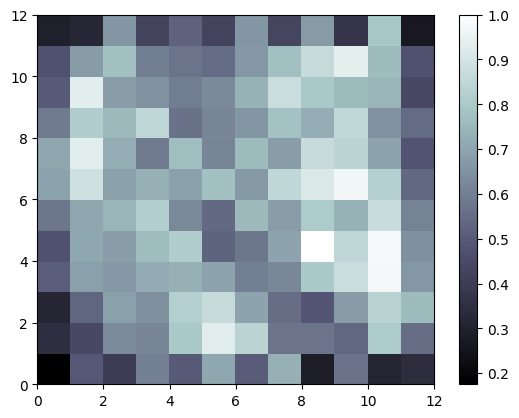

In [171]:
pcolor(som.distance_map())
colorbar()

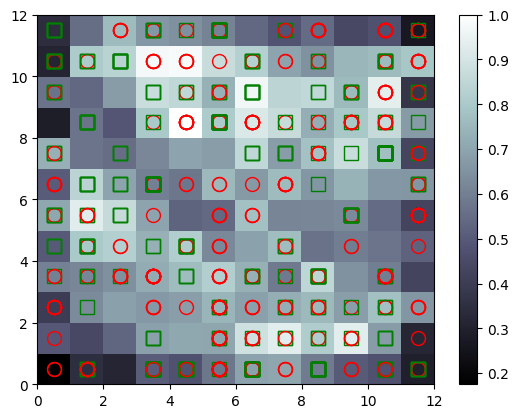

In [172]:
from pylab import bone, pcolor, colorbar, plot, show
import pylab as pl

bone()

pcolor(som.distance_map().T)
colorbar()
# r-o red circle for customes who did not get approval
# g-s  green square otherwise
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, 
        markers[y[i]], markeredgecolor = colors[y[i]], 
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)
show()

Observation: We can see some extreme values, the light squares (closer to 1). These are the ouliers. Our goal is to catch outliers who were approved (green circles in light square).  

## Finding the frauds


win_map returns a dictionary where ech key is the coordinates and each value is an array of all the corresponding input features.
E.g: { (6, 2): [ [0.84, ..., 0.012   ], ..., [0.81, ..., 0.17] ] }

Look at the map, and you get can get visually infer the coordinates that contain data.
E.g.: (x,y) = (2,5)

In [173]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(9,
              8): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.98014648, 1.        , 0.30706767, 0.09821429, 0.5       ,
                     0.15384615, 0.5       , 0.0877193 , 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.116     , 0.002     ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
                     0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([0.59042402, 1. 

In [174]:
frauds = mappings[(8, 7)]
frauds

[array([0.13505039, 1.        , 0.67413534, 0.09678571, 0.5       ,
        0.53846154, 0.375     , 0.08473684, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.16      , 0.        ]),
 array([0.20068955, 1.        , 0.30706767, 0.1875    , 0.5       ,
        0.61538462, 0.375     , 0.00298246, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.145     , 0.00006   ]),
 array([0.11651831, 1.        , 0.2793985 , 0.08928571, 0.5       ,
        0.53846154, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ]),
 array([0.46368263, 1.        , 0.50496241, 0.23214286, 0.5       ,
        0.53846154, 0.375     , 0.03508772, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.        , 0.00228   ]),
 array([0.1012938 , 1.        , 0.5124812 , 0.14875   , 0.5       ,
        1.        , 0.5       , 0.00298246, 0.        , 0.        ,
        0.        , 1.        , 0.5     

In [175]:
np.set_printoptions(suppress=True)
frauds = sc.inverse_transform(frauds)
frauds

array([[15599440.   ,        1.   ,       58.58 ,        2.71 ,
               2.   ,        8.   ,        4.   ,        2.415,
               0.   ,        0.   ,        0.   ,        1.   ,
               2.   ,      320.   ,        1.   ],
       [15615832.   ,        1.   ,       34.17 ,        5.25 ,
               2.   ,        9.   ,        4.   ,        0.085,
               0.   ,        0.   ,        0.   ,        1.   ,
               2.   ,      290.   ,        7.   ],
       [15594812.   ,        1.   ,       32.33 ,        2.5  ,
               2.   ,        8.   ,        4.   ,        1.25 ,
               0.   ,        0.   ,        0.   ,        1.   ,
               2.   ,      280.   ,        1.   ],
       [15681509.   ,        1.   ,       47.33 ,        6.5  ,
               2.   ,        8.   ,        4.   ,        1.   ,
               0.   ,        0.   ,        0.   ,        1.   ,
               2.   ,        0.   ,      229.   ],
       [15591010.   ,       

## Printing a Fraunch Client

In [176]:
frauds[0]

array([15599440.   ,        1.   ,       58.58 ,        2.71 ,
              2.   ,        8.   ,        4.   ,        2.415,
              0.   ,        0.   ,        0.   ,        1.   ,
              2.   ,      320.   ,        1.   ])